In [1]:
import pandas as pd
import numpy as np

import scipy 
from scipy.stats import norm
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score


import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./DATA/online_shoppers_intention.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.OperatingSystems.value_counts().sort

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
len(df.columns), df.columns[0:6], df.columns[8], df.columns[17],

(18,
 Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'],
       dtype='object'),
 'PageValues',
 'Revenue')

### Visualizations

We would like to visualize the PDF of the time-spent only for the customers who did a final transactions.

cols = [ 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'] 

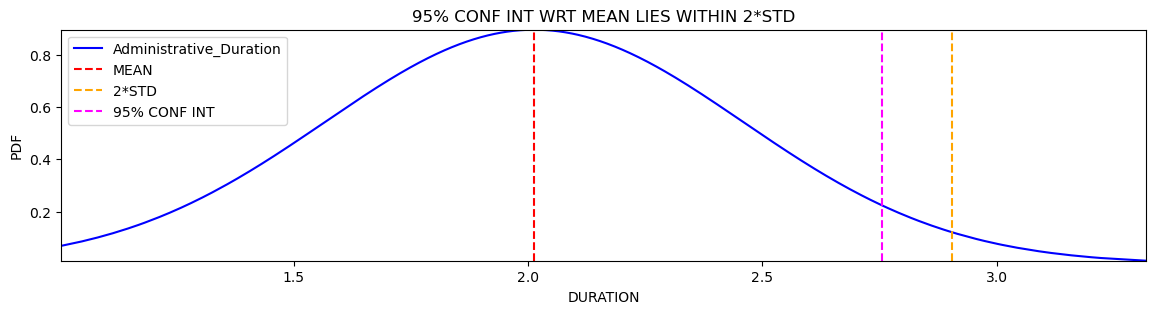

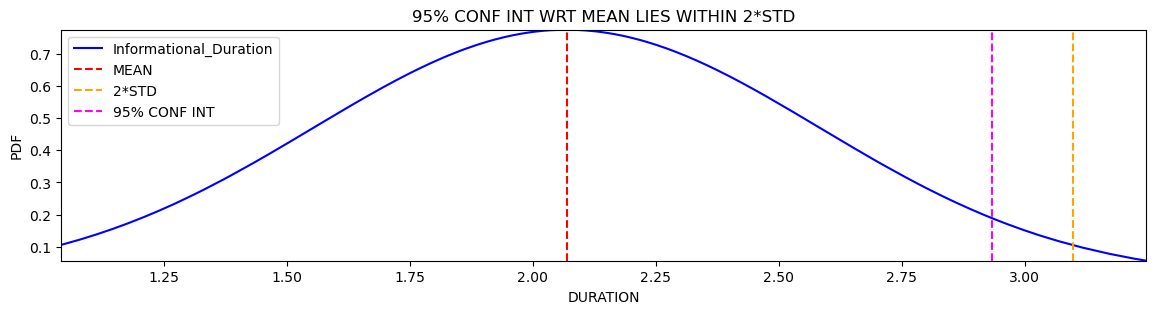

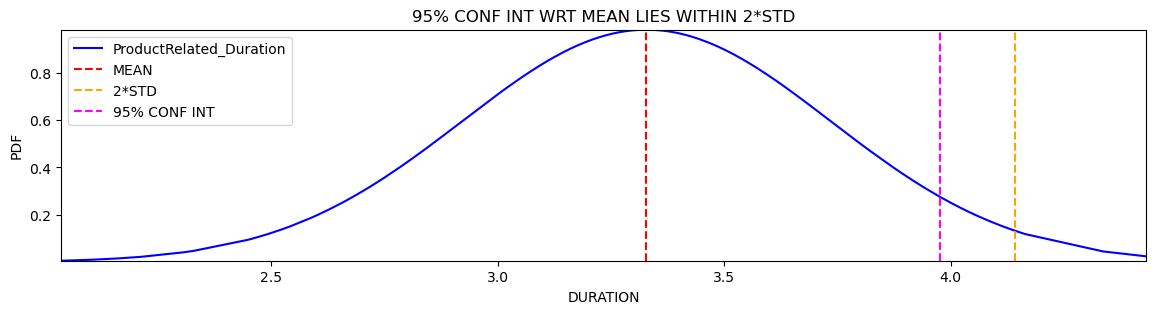

In [13]:
df1 = df[df['Revenue'] == True]
for col in cols:
    plt.figure(figsize=(14,3))
    df1 = df1[ df1[col] >10 ]
    datalog = np.sort(df1[col].apply(np.log10))
    datalog_pdf=norm.pdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) ) 
    datalog_cdf = norm.cdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) )
    pdf=norm.pdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) ) 
    datalog_cdf = norm.cdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) )
    plt.plot(datalog, datalog_pdf, label=col, color='blue')
    plt.axvline(np.mean(datalog), linestyle='--', label='MEAN', color='red')
    plt.axvline(np.mean(datalog)+2*np.std(datalog), linestyle='--', label='2*STD', color='orange')
    plt.axvline(np.percentile(datalog, [95]), linestyle='--', color='magenta', label='95% CONF INT')
    plt.legend()
    plt.autoscale(tight=True, enable=True)
    plt.title('95% CONF INT WRT MEAN LIES WITHIN 2*STD')
    plt.ylabel('PDF')
    plt.xlabel('DURATION')

### INFERENTIAL COMPARISON BETWEEN TWO GROUPS
    o Revenue == True
    o Revenue == False

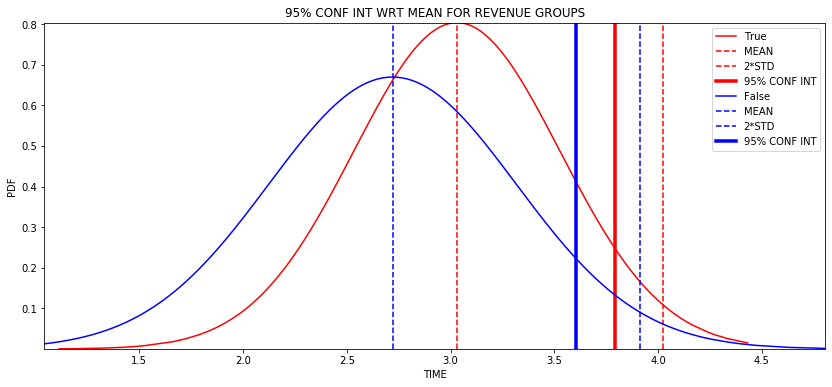

In [449]:
idx = 0
plt.figure(figsize=(14,6))
bolls = [True, False]
colr_data = ['red', 'blue']
for col in bolls:
    df1 = df[df['Revenue'] == col]
    df1 = df1[ df1['ProductRelated_Duration'] >10 ]
    datalog = np.sort(df1['ProductRelated_Duration'].apply(np.log10))
    datalog_pdf=norm.pdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) ) 
    datalog_cdf = norm.cdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) )
    plt.plot(datalog, datalog_pdf, color=colr_data[idx], label=col)
    plt.axvline(np.mean(datalog), linestyle='--', color=colr_data[idx], label='MEAN')
    plt.axvline(np.mean(datalog)+2*np.std(datalog), linestyle='--', color=colr_data[idx], label='2*STD')
    plt.axvline(np.percentile(datalog, [95]), linestyle='-', color=colr_data[idx], label='95% CONF INT', linewidth=3.5)
    plt.legend()
    plt.ylabel('PDF')
    plt.xlabel('TIME')
    plt.title('95% CONF INT WRT MEAN FOR REVENUE GROUPS')
    plt.autoscale(tight=True, enable=True)
    idx += 1

In [450]:
df_RT = df[df['Revenue'] == True]
df_RF = df[df['Revenue'] == False]

df1 = df_RT[ df_RT['ProductRelated_Duration'] >10 ]
df2 = df_RF[ df_RF['ProductRelated_Duration'] >10 ]

ttest_ind(df1['ProductRelated_Duration'], df2['ProductRelated_Duration'], equal_var=False)

Ttest_indResult(statistic=12.952064466401076, pvalue=3.959749814353132e-37)

[]

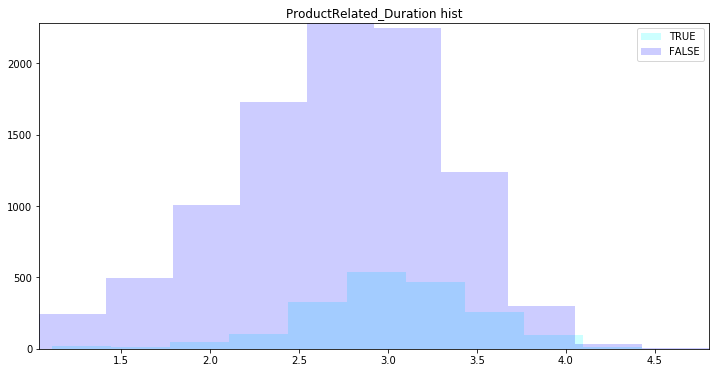

In [451]:
plt.figure(figsize=(12,6))
df1['ProductRelated_Duration'].apply(np.log10).hist(alpha=0.2, color='cyan', label='TRUE')
df2['ProductRelated_Duration'].apply(np.log10).hist(alpha=0.2, color='blue', label='FALSE')
plt.grid()
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('ProductRelated_Duration hist')
plt.plot()

In [452]:
df[df.columns[6:17]].describe()

,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [453]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [454]:
df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [455]:
SP_DAY = []
category = []
idx = 0
norm = df['SpecialDay'].value_counts().sum()
for val in df['SpecialDay'].value_counts():
    SP_DAY.append(val/norm)
    category.append(df['SpecialDay'].value_counts().index[idx])
    idx += 1 
    
SP_DAY, category

([0.8985401459854014,
  0.02846715328467153,
  0.026358475263584754,
  0.01970802919708029,
  0.014436334144363341,
  0.012489862124898622],
 [0.0, 0.6, 0.8, 0.4, 0.2, 1.0])

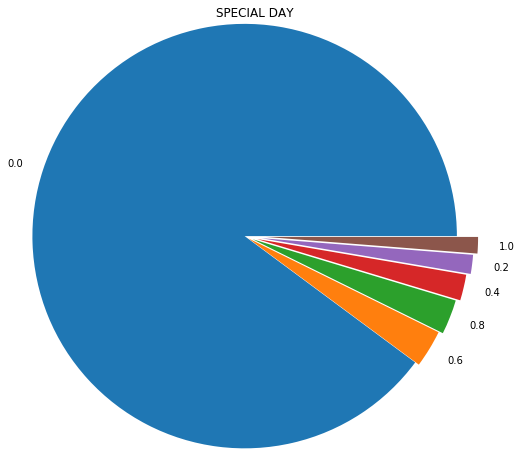

In [456]:
plt.figure(figsize=(8,10))
plt.pie(SP_DAY, labels=category, explode=[0, 0.02, 0.04, 0.06, 0.08, 0.10] )
plt.autoscale(enable=True, tight=True)
plt.title('SPECIAL DAY')
plt.grid()
plt.show()

In [457]:
df_RT['Month'].value_counts()

Nov     760
May     365
Dec     216
Mar     192
Oct     115
Sep      86
Aug      76
Jul      66
June     29
Feb       3
Name: Month, dtype: int64

In [458]:
rev = []
mon = []
idx = 0
norm = df_RT['Month'].value_counts().sum()
for val in df_RT['Month'].value_counts():
    rev.append(val/norm)
    mon.append(df['Month'].value_counts().index[idx])
    idx += 1 
    
rev, mon

([0.39832285115303984,
  0.19129979035639413,
  0.11320754716981132,
  0.10062893081761007,
  0.06027253668763103,
  0.04507337526205451,
  0.039832285115303984,
  0.03459119496855346,
  0.01519916142557652,
  0.0015723270440251573],
 ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'])

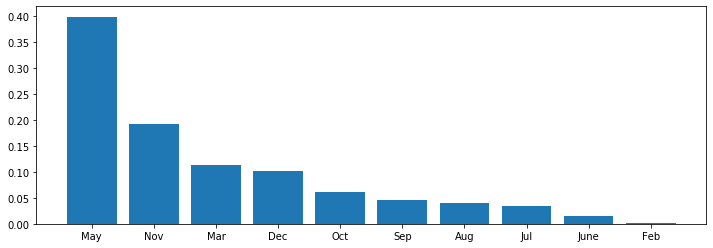

In [459]:
plt.figure(figsize=(12,4))
plt.bar(mon, rev)
plt.show()

# ML

In [460]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [461]:
df = df[df['Administrative_Duration'] > 0]
df = df[df['ProductRelated_Duration'] > 0]
df = df[df['Informational_Duration'] > 0]
print(len(df))
df['REV_B'] = df['Revenue'].apply(lambda x: 1 if x==True else 0)
df.head()

1981


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,REV_B
57,4.0,56.000000,2.0,120.0,36.0,998.741667,0.000000,0.014736,19.447079,0.2,Feb,2,2,4,1,Returning_Visitor,False,False,0
103,2.0,31.000000,1.0,16.0,36.0,2083.530952,0.000000,0.013510,0.000000,0.8,Feb,2,2,4,3,Returning_Visitor,False,False,0
109,6.0,326.250000,4.0,94.0,128.0,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False,0
161,2.0,58.000000,2.0,22.0,31.0,829.166667,0.030303,0.040606,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,True,False,0
187,10.0,293.778205,2.0,153.0,96.0,3283.166739,0.001961,0.013509,0.000000,0.0,Mar,3,2,6,2,Returning_Visitor,True,False,0


In [462]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'REV_B'],
      dtype='object')

In [463]:
attr = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

In [464]:
x_tr, x_t, y_tr, y_t = train_test_split(df[attr], df['REV_B'], test_size=0.4)

### ExtraTreesClassifier

In [465]:
from sklearn import ensemble 
from sklearn.ensemble import ExtraTreesClassifier
clf_ExtraTreesClassifier = ExtraTreesClassifier() 
clf_ExtraTreesClassifier.fit(x_tr, y_tr)
y_h = clf_ExtraTreesClassifier.predict(x_t)
accuracy_score(y_t, y_h)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7238335435056746

In [466]:
from sklearn.naive_bayes import GaussianNB

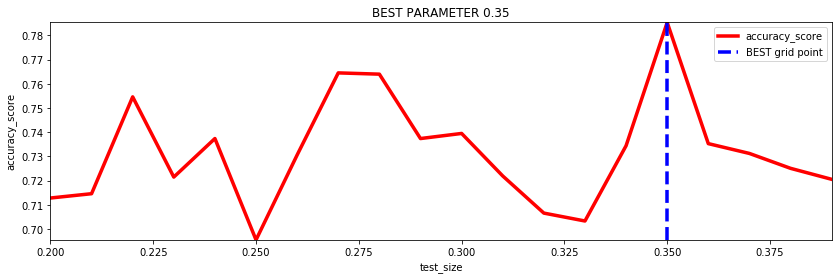

BEST PARAMETER 0.35
accuracy_score 0.79


In [467]:
test_sizee = np.arange(0.20, 0.4, 0.01)
scores = []
for t_size in test_sizee:
        x_tr, x_t, y_tr, y_t = train_test_split(df[attr].values,(df['REV_B']).values, test_size=t_size)
        lr = GaussianNB() #LogisticRegression()
        lr.fit(x_tr, y_tr)
        y_p = lr.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))
        
def ret_max(scores):
    maxx = 0
    maxx_idx = 0
    for idx in range(len(scores)):
        if scores[idx]>maxx:
            maxx = scores[idx]
            maxx_idx = idx
    return [maxx, maxx_idx]
   

plt.figure(figsize=(14,4))
plt.plot(test_sizee,scores, color='red', linewidth=3.5, label='accuracy_score')
plt.axvline(test_sizee[ret_max(scores)[1]], linestyle='--', color='blue', linewidth=3.5, label='BEST grid point')
plt.autoscale(tight=True, enable=True)
plt.legend()
plt.title('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
plt.xlabel('test_size')
plt.ylabel('accuracy_score')
plt.show()
print('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
print('accuracy_score %0.2f' %ret_max(scores)[0])

### RandomForestClassifier

In [468]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=12, random_state=0)
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
accuracy_score(y_t, y_p), roc_auc_score(y_t, y_p)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.7360931435963778, 0.5163762751647558)

In [469]:
def grid_search():
    depth_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    accu_score = []
    for d in depth_grid:
        score = 0
        for rn in range(10):
            clf = RandomForestClassifier(max_depth=d)
            clf.fit(x_tr, y_tr)
            y_p = clf.predict(x_t)
            score += accuracy_score(y_t, y_p)
        accu_score.append(score/10.0)
    return depth_grid,accu_score

In [470]:
tree_depth, score = grid_search()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [471]:
tree_depth, score

([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [0.7542043984476068,
  0.7539456662354465,
  0.7513583441138423,
  0.7485122897800777,
  0.7481241914618371,
  0.7446313065976715,
  0.73751617076326,
  0.7357050452781372,
  0.7289780077619663,
  0.7289780077619663,
  0.7214747736093143])

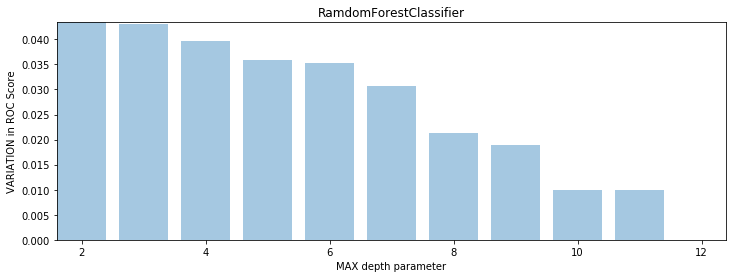

In [472]:
plt.figure(figsize=(12,4))
plt.bar(tree_depth,np.abs(np.min(score)-score)/np.max(score), alpha=0.4 )
plt.autoscale(enable=True, tight=True)
plt.title('RamdomForestClassifier')
plt.ylabel('VARIATION in ROC Score')
plt.xlabel('MAX depth parameter')
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

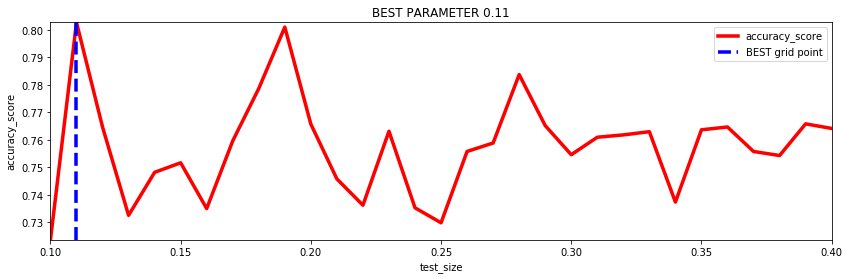

BEST PARAMETER 0.11
accuracy_score 0.80


In [473]:
test_sizee = np.arange(0.10, 0.4, 0.01)
scores = []
for t_size in test_sizee:
        x_tr, x_t, y_tr, y_t = train_test_split(df[attr].values,(df['REV_B']).values, test_size=t_size)
        lr = RandomForestClassifier(max_depth=2) #LogisticRegression()
        lr.fit(x_tr, y_tr)
        y_p = lr.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))
        
def ret_max(scores):
    maxx = 0
    maxx_idx = 0
    for idx in range(len(scores)):
        if scores[idx]>maxx:
            maxx = scores[idx]
            maxx_idx = idx
    return [maxx, maxx_idx]
   

plt.figure(figsize=(14,4))
plt.plot(test_sizee,scores, color='red', linewidth=3.5, label='accuracy_score')
plt.axvline(test_sizee[ret_max(scores)[1]], linestyle='--', color='blue', linewidth=3.5, label='BEST grid point')
plt.autoscale(tight=True, enable=True)
plt.legend()
plt.title('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
plt.xlabel('test_size')
plt.ylabel('accuracy_score')
plt.show()
print('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
print('accuracy_score %0.2f' %ret_max(scores)[0])

### LogisticRegression

In [474]:
x_tr, x_t, y_tr, y_t = train_test_split(df[attr], df['REV_B'], test_size=0.24)
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_h = lr.predict(x_t)
accuracy_score(y_t, y_h), roc_auc_score(y_t, y_h)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.7710084033613446, 0.5032247581431392)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

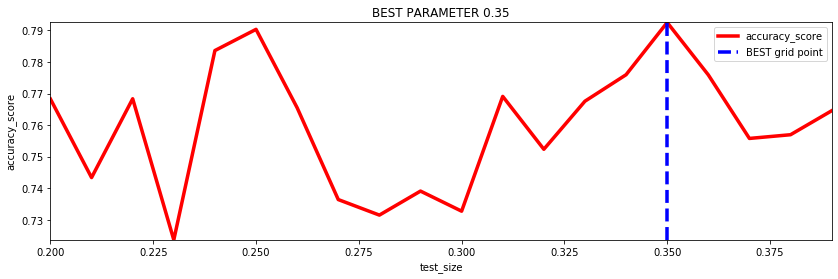

BEST PARAMETER 0.35
accuracy_score 0.79


In [475]:
test_sizee = np.arange(0.20, 0.4, 0.01)
scores = []
for t_size in test_sizee:
        x_tr, x_t, y_tr, y_t = train_test_split(df[attr].values,(df['REV_B']).values, test_size=t_size)
        lr = LogisticRegression()
        lr.fit(x_tr, y_tr)
        y_p = lr.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))
        
def ret_max(scores):
    maxx = 0
    maxx_idx = 0
    for idx in range(len(scores)):
        if scores[idx]>maxx:
            maxx = scores[idx]
            maxx_idx = idx
    return [maxx, maxx_idx]
   

plt.figure(figsize=(14,4))
plt.plot(test_sizee,scores, color='red', linewidth=3.5, label='accuracy_score')
plt.axvline(test_sizee[ret_max(scores)[1]], linestyle='--', color='blue', linewidth=3.5, label='BEST grid point')
plt.autoscale(tight=True, enable=True)
plt.legend()
plt.title('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
plt.xlabel('test_size')
plt.ylabel('accuracy_score')
plt.show()
print('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
print('accuracy_score %0.2f' %ret_max(scores)[0])